# Questions for Dataset 1:

## 1. Basic DataFrame Operations:

### Load the dataset into a Pandas DataFrame.

In [250]:
import pandas as pd

students_grades: pd.DataFrame = pd.read_csv("students_grades.csv")
students_grades

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
0,1,John,16,M,85,92,78,84,90
1,2,Alice,15,F,79,95,88,92,87
2,3,Bob,16,M,90,85,86,88,95
3,4,Carol,15,F,77,89,90,81,85
4,5,David,16,M,92,80,79,85,92
5,6,Eve,15,F,85,87,84,89,90
6,7,Frank,16,M,75,90,82,78,88
7,8,Grace,15,F,80,92,85,90,91
8,9,Henry,16,M,88,83,87,86,85
9,10,Ivy,15,F,84,91,89,83,89


### Display the first 5 rows of the DataFrame.

In [253]:
students_grades.head()

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
0,1,John,16,M,85,92,78,84,90
1,2,Alice,15,F,79,95,88,92,87
2,3,Bob,16,M,90,85,86,88,95
3,4,Carol,15,F,77,89,90,81,85
4,5,David,16,M,92,80,79,85,92


### Display the summary statistics of the DataFrame.

In [256]:
students_grades.describe()

,StudentID,Age,Math,Science,English,History,Physical_Education
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,15.500000,83.500000,88.400000,84.800000,85.600000,89.200000
std,3.02765,0.527046,5.642104,4.623611,4.077036,4.299871,3.119829
min,1.00000,15.000000,75.000000,80.000000,78.000000,78.000000,85.000000
25%,3.25000,15.000000,79.250000,85.500000,82.500000,83.250000,87.250000
50%,5.50000,15.500000,84.500000,89.500000,85.500000,85.500000,89.500000
75%,7.75000,16.000000,87.250000,91.750000,87.750000,88.750000,90.750000
max,10.00000,16.000000,92.000000,95.000000,90.000000,92.000000,95.000000


### Display the column names of the DataFrame.

In [259]:
students_grades.columns

Index(['StudentID', 'Name', 'Age', 'Gender', 'Math', 'Science', 'English',
       'History', 'Physical_Education'],
      dtype='object')

### Count the number of male and female students.

In [262]:
students_grades["Gender"].value_counts()

Gender
M    5
F    5
Name: count, dtype: int64

## 2. Filtering and Subsetting:

### Filter the DataFrame to show only students who are 16 years old.

In [266]:
is_equal_to_16 = students_grades["Age"] == 16
students_grades[is_equal_to_16]

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
0,1,John,16,M,85,92,78,84,90
2,3,Bob,16,M,90,85,86,88,95
4,5,David,16,M,92,80,79,85,92
6,7,Frank,16,M,75,90,82,78,88
8,9,Henry,16,M,88,83,87,86,85


### Filter the DataFrame to show only female students.

In [269]:
is_female =  students_grades["Gender"] == "F"
students_grades[is_female]

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
1,2,Alice,15,F,79,95,88,92,87
3,4,Carol,15,F,77,89,90,81,85
5,6,Eve,15,F,85,87,84,89,90
7,8,Grace,15,F,80,92,85,90,91
9,10,Ivy,15,F,84,91,89,83,89


### Filter the DataFrame to show students with Math scores above 85.

In [272]:
math_greater_than_85 = students_grades["Math"] > 85
students_grades[math_greater_than_85]

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
2,3,Bob,16,M,90,85,86,88,95
4,5,David,16,M,92,80,79,85,92
8,9,Henry,16,M,88,83,87,86,85


### Select the Name and Total_Grades columns for all students.

In [275]:
students_grades["Total_Grades"] = students_grades.sum(axis='columns',numeric_only=True)
total_grade_for_student = students_grades[["Name","Total_Grades"]]
total_grade_for_student

,Name,Total_Grades
0,John,446
1,Alice,458
2,Bob,463
3,Carol,441
4,David,449
5,Eve,456
6,Frank,436
7,Grace,461
8,Henry,454
9,Ivy,461


### Calculate the average Math score for male and female students.

In [244]:
students_grades[["Math","Gender"]].groupby("Gender").mean()

,Math
Gender,
F,81.0
M,86.0


## 3. Aggregation and Grouping:

### Calculate the average grade for each subject.

In [189]:
subject_scores = students_grades[["Math","Science","English","History","Physical_Education"]]
average_scores = subject_scores.mean()
average_scores

Math                  83.5
Science               88.4
English               84.8
History               85.6
Physical_Education    89.2
dtype: float64

### Calculate the average grade for each gender.

In [192]:
students_grades[["Math","Science","English","History","Physical_Education","Gender"]].groupby("Gender").mean(numeric_only=True)

,Math,Science,English,History,Physical_Education
Gender,,,,,
F,81.0,90.8,87.2,87.0,88.4
M,86.0,86.0,82.4,84.2,90.0


### Calculate the total grades for each student (sum of all subjects).

In [195]:
total_grade_for_student

,Name,Total_Grades
0,John,446
1,Alice,458
2,Bob,463
3,Carol,441
4,David,449
5,Eve,456
6,Frank,436
7,Grace,461
8,Henry,454
9,Ivy,461


### Find the student with the highest total grade.

In [396]:
students_grades.loc[students_grades.idxmax()["Total_Grades"],["Name","Total_Grades"]]

Name            Bob
Total_Grades    463
Name: 2, dtype: object

### Calculate the average age of the students.

In [201]:
students_grades.mean(numeric_only=True)["Age"]

15.5

## 4. Data Visualization:

### Create a bar plot showing the average grade for each subject.

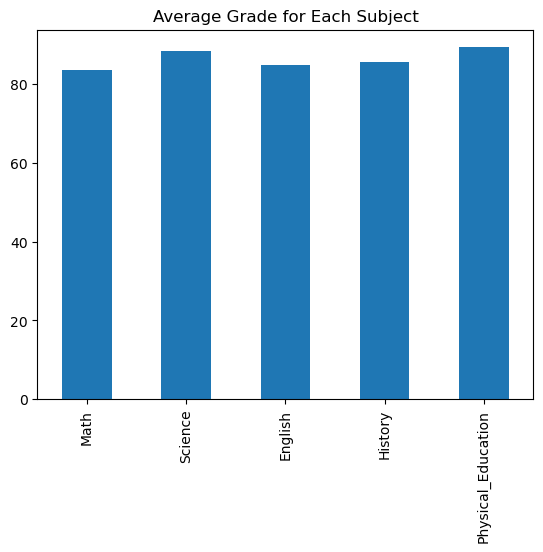

In [205]:
import matplotlib.pyplot as plt

average_scores.plot(kind="bar",title="Average Grade for Each Subject")
plt.show()

### Create a bar plot showing the total grades of each student.

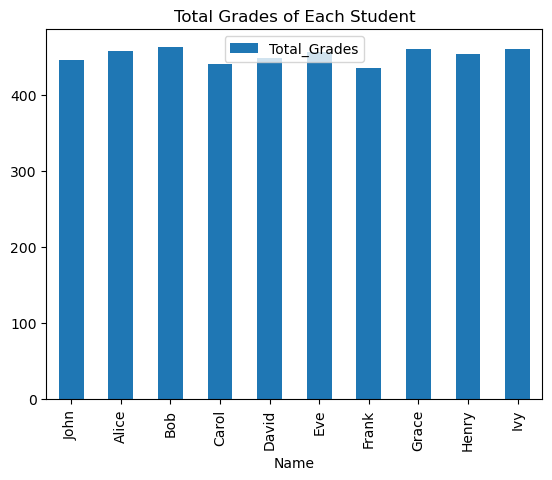

In [367]:
students_grades.plot(x="Name",y="Total_Grades",kind="bar",title="Total Grades of Each Student")
plt.show()

### Create a histogram showing the distribution of Math scores.

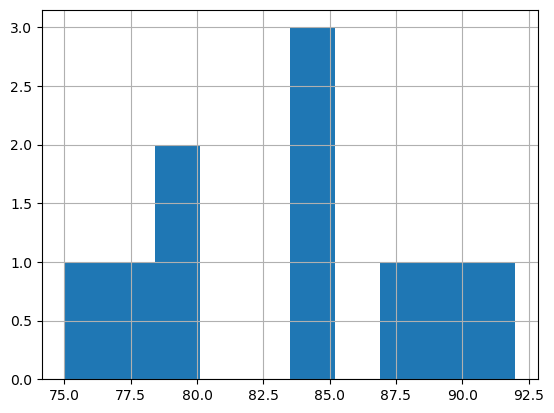

In [304]:
students_grades["Math"].hist()
plt.show()

### Create a box plot to show the distribution of grades for each subject.

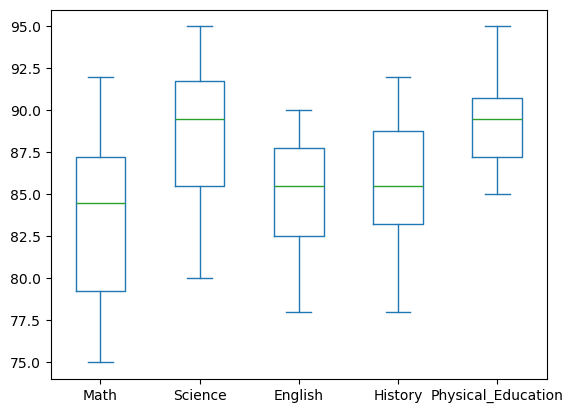

In [365]:
subject_scores.plot.box()
plt.show()

### Create a scatter plot showing the relationship between Math and Science scores.

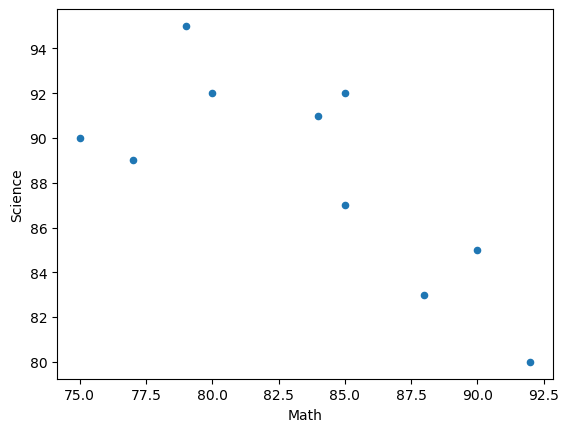

In [334]:
students_grades.plot(x="Math", y="Science", kind="scatter")
plt.show()